In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
caminho = "dados/chagas_all_features.xlsx"
df = pd.read_excel(caminho)
df.tail()

,ID,Name,Filename,Date Holter,Time,Sex,Nat,Event (FU-5 years),Age,Obito_MS,...,std_HRV_SampEn,std_HRV_ShanEn,std_HRV_FuzzyEn,std_HRV_MSEn,std_HRV_CMSEn,std_HRV_RCMSEn,std_HRV_CD,std_HRV_HFD,std_HRV_KFD,std_HRV_LZC
171,172,Vicente de Paula Moreira,409.dat,2013-04-03,5.00,1,MG,0,57,0,...,0.380903,0.674390,0.307490,0.330902,0.129884,0.302406,0.232214,0.060044,0.765449,0.223831
172,173,Vicente Ramos Souza,411.dat,1994-01-21,5.00,1,BA,0,38,0,...,0.144995,0.290540,0.133591,0.220742,0.115529,0.189259,0.181206,0.030404,1.152431,0.093886
173,174,Waldir Furlado de Carvalho,413.dat,2006-07-13,5.00,0,AL,0,36,0,...,0.245214,0.263020,0.210037,0.208679,0.097427,0.246654,0.291459,0.027514,1.602466,0.064356
174,175,Dolores Ferreira da Silva,081.dat,2015-10-22,0.22,0,PA,1,49,1,...,0.152375,0.061426,0.111517,0.046394,0.010397,0.174374,0.130748,0.030250,0.117418,0.061736
175,176,Raimunda Gonçaves Silva,368.dat,1999-09-05,0.33,0,MG,1,36,1,...,0.168293,0.118656,0.100127,0.110737,0.053552,0.129266,0.170506,0.017579,1.079906,0.029523


In [3]:
df.isnull().sum().sum()

np.int64(0)

In [4]:
df.shape

(176, 254)


Distribuição de Sexo
Sex
0    101
1     75
Name: count, dtype: int64


C:\Users\adria\AppData\Local\Temp\ipykernel_36828\1233334303.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='viridis')


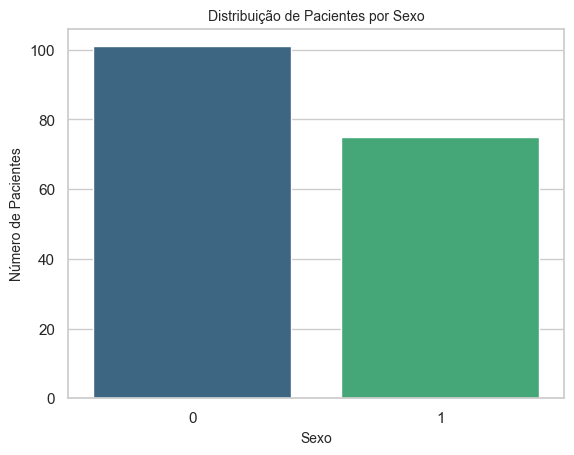

In [5]:
sns.set_theme(style="whitegrid")

print("\nDistribuição de Sexo")
print(df['Sex'].value_counts())

plt.figure()
sns.countplot(x='Sex', data=df, palette='viridis')
plt.title('Distribuição de Pacientes por Sexo', fontsize=10)
plt.xlabel('Sexo', fontsize=10)
plt.ylabel('Número de Pacientes', fontsize=10)
plt.show()


Análise: Distribuição das Classes
Obito_MS_FU-5 years
0    117
1     59
Name: count, dtype: int64


C:\Users\adria\AppData\Local\Temp\ipykernel_36828\3020677748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Obito_MS_FU-5 years', data=df, palette='plasma', order=df['Obito_MS_FU-5 years'].value_counts().index)


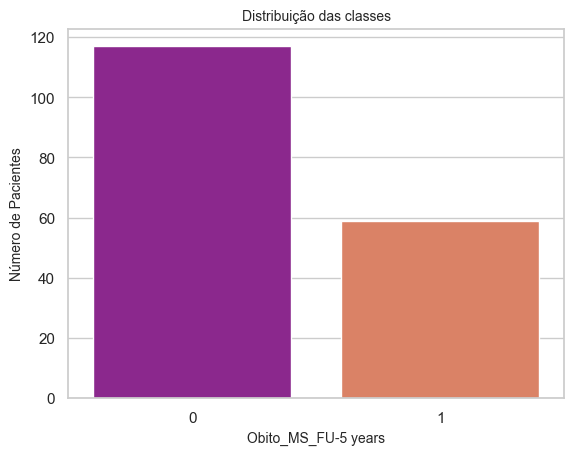

In [6]:
print("\nAnálise: Distribuição das Classes")
print(df['Obito_MS_FU-5 years'].value_counts())

plt.figure()
sns.countplot(x='Obito_MS_FU-5 years', data=df, palette='plasma', order=df['Obito_MS_FU-5 years'].value_counts().index)
plt.title('Distribuição das classes', fontsize=10)
plt.xlabel('Obito_MS_FU-5 years', fontsize=10)
plt.ylabel('Número de Pacientes', fontsize=10)
plt.show()


Análise: 'Event (FU-5 years)' vs 'Obito_MS'
Tabela de Contingência:
Obito_MS              0   1
Event (FU-5 years)         
0                   106   9
1                     2  59


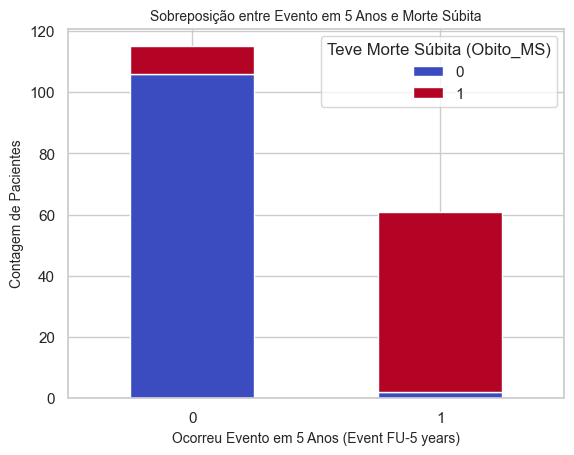

In [7]:
print("\nAnálise: 'Event (FU-5 years)' vs 'Obito_MS'")
# Tabela de contingência para ver a sobreposição
crosstab_event_obito = pd.crosstab(df['Event (FU-5 years)'], df['Obito_MS'])
print("Tabela de Contingência:")
print(crosstab_event_obito)

crosstab_event_obito.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Sobreposição entre Evento em 5 Anos e Morte Súbita', fontsize=10)
plt.xlabel('Ocorreu Evento em 5 Anos (Event FU-5 years)', fontsize=10)
plt.ylabel('Contagem de Pacientes', fontsize=10)
plt.xticks(rotation=0)
plt.legend(title='Teve Morte Súbita (Obito_MS)')
plt.show()


Gráfico de Dispersão para Rassi Points


C:\Users\adria\AppData\Local\Temp\ipykernel_36828\1348716156.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Obito_MS', y='Rassi Points', data=df, jitter=True, alpha=0.7, palette='viridis')


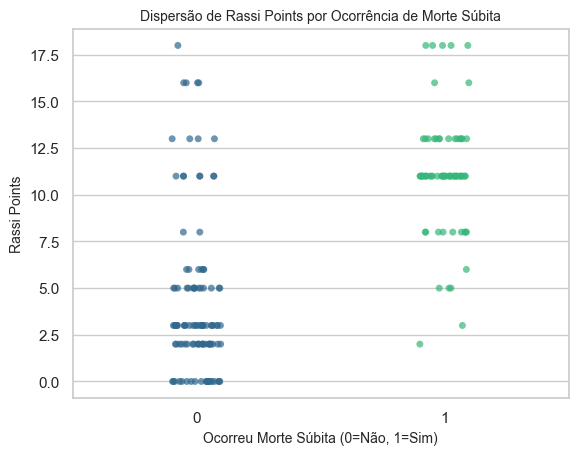

In [8]:
print("\nGráfico de Dispersão para Rassi Points")
plt.figure()
    
sns.stripplot(x='Obito_MS', y='Rassi Points', data=df, jitter=True, alpha=0.7, palette='viridis')
    
plt.title('Dispersão de Rassi Points por Ocorrência de Morte Súbita', fontsize=10)
plt.xlabel('Ocorreu Morte Súbita (0=Não, 1=Sim)', fontsize=10)
plt.ylabel('Rassi Points', fontsize=10)
plt.show()


Gráfico de Dispersão para Fração de Ejeção (FE)


C:\Users\adria\AppData\Local\Temp\ipykernel_36828\1969270547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Obito_MS', y='FE', data=df, jitter=True, alpha=0.7, palette='plasma')


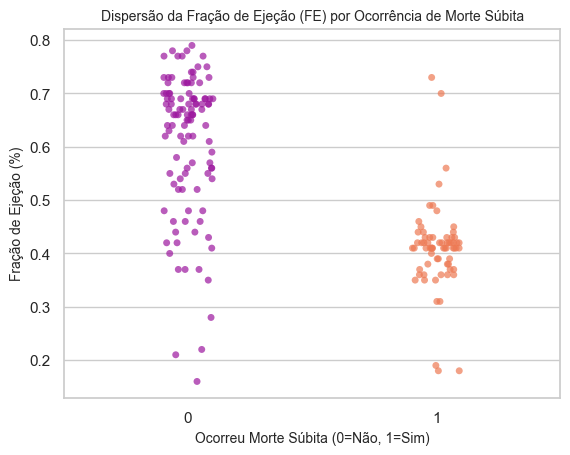

In [9]:
print("Gráfico de Dispersão para Fração de Ejeção (FE)")
plt.figure()
    
sns.stripplot(x='Obito_MS', y='FE', data=df, jitter=True, alpha=0.7, palette='plasma')
    
plt.title('Dispersão da Fração de Ejeção (FE) por Ocorrência de Morte Súbita', fontsize=10)
plt.xlabel('Ocorreu Morte Súbita (0=Não, 1=Sim)', fontsize=10)
plt.ylabel('Fração de Ejeção (%)', fontsize=10)
plt.show()


Idade e Morte Súbita


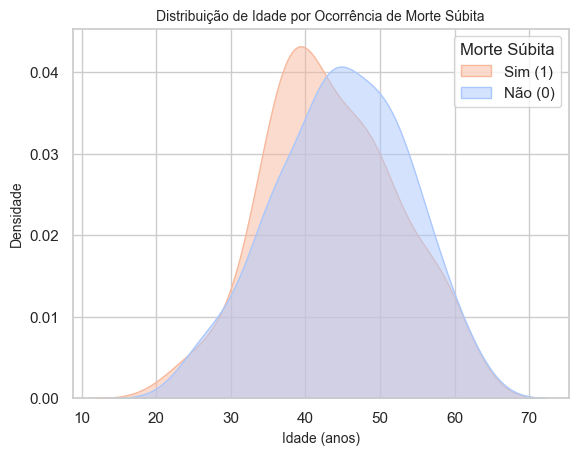

In [10]:
print("\nIdade e Morte Súbita")
plt.figure()

sns.kdeplot(data=df, x='Age', hue='Obito_MS', fill=True, common_norm=False, palette='coolwarm', alpha=0.5)
plt.title('Distribuição de Idade por Ocorrência de Morte Súbita', fontsize=10)
plt.xlabel('Idade (anos)', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.legend(title='Morte Súbita', labels=['Sim (1)', 'Não (0)'])
plt.show()


Distribuição da Classe de Fração de Ejeção
Distribuição da Classe_FE:
Classe_FE
0    84
2    64
1    19
3     9
Name: count, dtype: int64


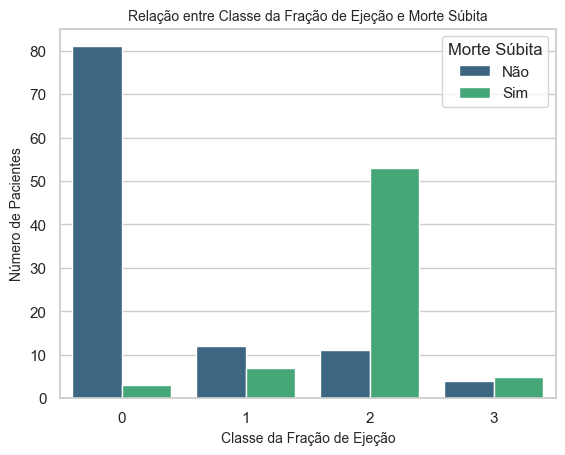

In [11]:
print("\nDistribuição da Classe de Fração de Ejeção")
print("Distribuição da Classe_FE:")
print(df['Classe_FE'].value_counts())

plt.figure()
sns.countplot(data=df, x='Classe_FE', hue='Obito_MS', palette='viridis')
plt.title('Relação entre Classe da Fração de Ejeção e Morte Súbita', fontsize=10)
plt.xlabel('Classe da Fração de Ejeção', fontsize=10)
plt.ylabel('Número de Pacientes', fontsize=10)
plt.legend(title='Morte Súbita', labels=['Não', 'Sim'])
plt.show()


Análise de Interação: FE, Morte Súbita e Sexo


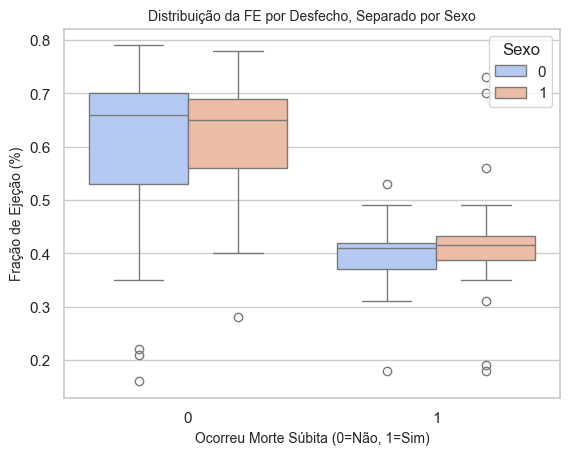

In [12]:
print("\nAnálise de Interação: FE, Morte Súbita e Sexo")
plt.figure()
sns.boxplot(data=df, x='Obito_MS', y='FE', hue='Sex', palette='coolwarm')
plt.title('Distribuição da FE por Desfecho, Separado por Sexo', fontsize=10)
plt.xlabel('Ocorreu Morte Súbita (0=Não, 1=Sim)', fontsize=10)
plt.ylabel('Fração de Ejeção (%)', fontsize=10)
plt.legend(title='Sexo')
plt.show()


Features mais Correlacionadas


C:\Users\adria\AppData\Local\Temp\ipykernel_36828\277754260.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='BuPu')


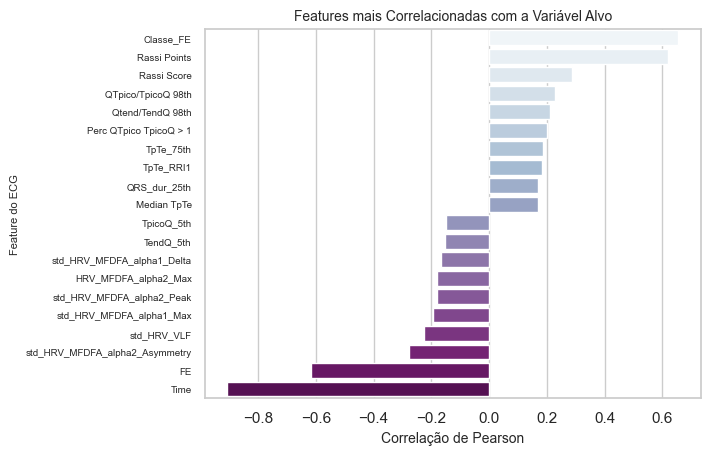

In [18]:
print("\nFeatures mais Correlacionadas")
# Selecionando apenas colunas numéricas
df_numeric = df.select_dtypes(include=np.number)

# Calculando correlação com a variável alvo
corr_com_alvo = df_numeric.corr()['Obito_MS_FU-5 years'].sort_values(ascending=False)

# Removendo a correlação da própria variável e outras relacionadas ao desfecho
corr_com_alvo = corr_com_alvo.drop(['Obito_MS', 'Obito_MS_FU-5 years', 'Event (FU-5 years)'], errors='ignore')

# Top 10 features com correlação positiva e negativa
top_positivas = corr_com_alvo.head(10)
top_negativas = corr_com_alvo.tail(10)

# Concatenando para plotar
top_features = pd.concat([top_positivas, top_negativas])

plt.figure()
sns.barplot(x=top_features.values, y=top_features.index, palette='BuPu')
plt.title('Features mais Correlacionadas com a Variável Alvo', fontsize=10)
plt.xlabel('Correlação de Pearson', fontsize=10)
plt.ylabel('Feature do ECG', fontsize=8)
plt.tick_params(axis='y', labelsize=7)
plt.show()

In [14]:
print(df['Rassi Points'].unique()) 
print(df['Classe_FE'].unique())

[ 2 11  8  5 13  3 18  6  0 16]
[0 2 1 3]
